In [ ]:
pip install pycaret

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv('https://github.com/jojo62000/Smarter_Decisions/raw/master/Chapter%206/Data/Final_SolarData.csv')

In [ ]:
dataset.shape

(119296, 23)

In [ ]:
dataset.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
0,Peru,2015-12-02 00:00:27,0.0,0.0,0.0,0.0,98.78,0.0,0.0,0.00,182.47,0.96,188.58,0.00,81.46,0.43,188.58,0.52,0.32,0.000,0.000,15,38.44
1,Peru,2015-12-02 00:01:40,0.0,0.0,0.0,0.0,98.80,0.0,0.0,0.01,192.18,1.01,188.51,0.01,71.66,0.38,188.51,0.52,0.32,0.007,0.000,0,38.44
2,Peru,2015-12-02 00:02:52,0.0,0.0,0.0,0.0,98.55,0.0,0.0,0.00,185.28,0.98,188.12,0.00,81.26,0.43,188.12,0.52,0.32,0.000,0.007,15,38.44
3,Peru,2015-12-02 00:04:05,0.0,0.0,0.0,0.0,98.64,0.0,0.0,0.00,175.68,0.93,188.29,0.00,87.84,0.46,188.29,0.66,0.45,0.021,0.007,0,38.44
4,Peru,2015-12-02 00:05:18,0.0,0.0,0.0,0.0,98.59,0.0,0.0,0.01,188.92,1.00,188.51,0.00,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0,38.44


In [ ]:
dataset.tail()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
119291,Peru,2016-03-14 22:22:02,0.0,1.11,0.0,0.0,94.88,1.50,142.87,0.00,124.63,0.65,189.82,0.01,68.87,0.36,189.82,0.57,0.38,0.014,0.007,15,39.12
119292,Peru,2016-03-14 22:23:14,0.0,1.11,0.0,0.0,94.58,0.47,44.50,0.01,114.46,0.60,189.26,0.00,58.86,0.31,189.26,0.56,0.39,0.007,0.007,0,38.94
119293,Peru,2016-03-14 22:24:27,0.0,1.23,0.0,0.0,93.97,0.28,26.53,0.00,131.01,0.69,189.56,0.00,65.50,0.34,189.56,0.56,0.38,0.007,0.000,0,38.94
119294,Peru,2016-03-14 22:25:40,0.0,1.17,0.0,0.0,94.41,1.19,112.54,0.00,121.10,0.63,189.43,0.00,62.19,0.32,189.43,0.57,0.38,0.014,0.007,0,38.94
119295,Peru,2016-03-14 22:26:52,0.0,1.17,0.0,0.0,94.33,1.28,121.32,0.00,124.50,0.65,189.62,0.00,62.25,0.32,189.62,0.57,0.38,0.007,0.007,0,38.84


In [ ]:
dataset.isnull()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119292,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119293,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119294,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.describe()

,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
count,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119120.000000
mean,81.551298,3.123387,0.008706,508.336857,98.691006,4.170616,421.159804,0.002980,174.804158,0.930739,186.679366,0.001610,94.917555,0.504330,186.679366,0.293585,0.111630,0.004202,0.001568,312.958942,38.506775
std,85.631798,3.768051,0.018784,651.506325,2.883481,5.474155,557.349818,0.007705,60.718941,0.322839,5.547655,0.003834,25.500409,0.138037,5.547655,0.224464,1.467514,0.007349,0.004476,485.932112,0.436293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.030000,0.290000,127.810000,0.000000,0.000000,0.130000,127.810000,0.000000,0.000000,0.000000,0.000000,0.000000,36.540000
25%,0.000000,0.000000,0.000000,0.000000,97.020000,0.000000,0.000000,0.000000,134.180000,0.700000,186.070000,0.000000,75.290000,0.410000,186.070000,0.190000,0.000000,0.000000,0.000000,0.000000,38.440000
50%,0.000000,1.170000,0.000000,0.000000,98.770000,0.970000,94.130000,0.000000,165.370000,0.880000,187.270000,0.000000,97.330000,0.510000,187.270000,0.190000,0.000000,0.000000,0.000000,30.000000,38.440000
75%,182.390000,6.300000,0.020000,1130.600000,100.530000,8.840000,885.865000,0.010000,204.617500,1.080000,188.060000,0.000000,113.060000,0.600000,188.060000,0.330000,0.120000,0.007000,0.000000,545.000000,38.440000
max,198.750000,18.350000,3.230000,2980.960000,112.070000,23.990000,2526.640000,2.010000,461.430000,2.480000,190.860000,0.270000,242.000000,1.330000,190.860000,2.320000,355.270000,1.162000,0.420000,1883.000000,45.540000


In [ ]:
dataset.columns

Index(['location', 'date_time', 'solarvoltage', 'solarcurrent', 'solarenergy',
       'solarpower', 'batteryvoltage', 'batterycurrent', 'batterypower',
       'load_energy1', 'load_power1', 'load_current1', 'load_voltage1',
       'load_energy2', 'load_power2', 'load_current2', 'load_voltage2',
       'inverter_input_power', 'inverter_output_power',
       'inverter_input_energy', 'inverter_output_energy', 'irradiance',
       'temperature'],
      dtype='object')

In [ ]:
data_train=dataset.sample(frac=0.9,random_state=900)

In [ ]:
data_train.shape

(107366, 23)

In [ ]:
data_train.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
57303,Peru,2016-01-21 05:34:07,0.0,0.00,0.0,0.0,97.21,0.00,0.00,0.01,361.10,1.93,186.59,0.0,116.06,0.62,186.59,0.19,0.0,0.007,0.0,0,38.44
36077,Peru,2016-01-02 23:42:14,0.0,0.00,0.0,0.0,91.48,0.00,0.00,0.00,68.46,0.53,127.81,0.0,61.83,0.48,127.81,0.18,0.0,0.000,0.0,15,38.44
74365,Peru,2016-02-05 01:55:45,0.0,0.00,0.0,0.0,96.82,0.00,0.00,0.01,162.67,0.88,184.60,0.0,105.26,0.57,184.60,0.00,0.0,0.000,0.0,0,38.44
114508,Peru,2016-03-10 20:16:06,0.0,1.11,0.0,0.0,99.95,1.16,116.01,0.00,137.47,0.72,189.43,0.0,75.28,0.39,189.43,0.19,0.0,0.007,0.0,15,40.03
36147,Peru,2016-01-03 01:07:07,0.0,0.00,0.0,0.0,91.23,0.00,0.00,0.00,72.87,0.57,127.81,0.0,64.04,0.50,127.81,0.18,0.0,0.000,0.0,0,38.44


In [ ]:
data_test=dataset.drop(data_train.index)

In [ ]:
data_test.shape

(11930, 23)

In [ ]:
data_test.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
4,Peru,2015-12-02 00:05:18,0.0,0.0,0.0,0.0,98.59,0.0,0.0,0.01,188.92,1.00,188.51,0.0,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0,38.44
7,Peru,2015-12-02 00:08:56,0.0,0.0,0.0,0.0,98.80,0.0,0.0,0.00,185.63,0.98,188.48,0.0,81.42,0.43,188.48,0.52,0.32,0.007,0.007,45,38.44
19,Peru,2015-12-02 00:23:29,0.0,0.0,0.0,0.0,98.97,0.0,0.0,0.00,185.67,0.98,188.51,0.0,87.94,0.46,188.51,0.42,0.22,0.014,0.000,0,38.44
21,Peru,2015-12-02 00:25:55,0.0,0.0,0.0,0.0,98.66,0.0,0.0,0.01,181.94,0.96,188.02,0.0,87.72,0.46,188.02,0.42,0.22,0.007,0.007,30,38.44
29,Peru,2015-12-02 00:35:37,0.0,0.0,0.0,0.0,98.67,0.0,0.0,0.00,185.25,0.98,188.09,0.0,91.00,0.48,188.09,0.52,0.32,0.007,0.007,30,38.44


In [ ]:
data_train.reset_index(drop=True,inplace=True)

In [ ]:
data_train.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
0,Peru,2016-01-21 05:34:07,0.0,0.00,0.0,0.0,97.21,0.00,0.00,0.01,361.10,1.93,186.59,0.0,116.06,0.62,186.59,0.19,0.0,0.007,0.0,0,38.44
1,Peru,2016-01-02 23:42:14,0.0,0.00,0.0,0.0,91.48,0.00,0.00,0.00,68.46,0.53,127.81,0.0,61.83,0.48,127.81,0.18,0.0,0.000,0.0,15,38.44
2,Peru,2016-02-05 01:55:45,0.0,0.00,0.0,0.0,96.82,0.00,0.00,0.01,162.67,0.88,184.60,0.0,105.26,0.57,184.60,0.00,0.0,0.000,0.0,0,38.44
3,Peru,2016-03-10 20:16:06,0.0,1.11,0.0,0.0,99.95,1.16,116.01,0.00,137.47,0.72,189.43,0.0,75.28,0.39,189.43,0.19,0.0,0.007,0.0,15,40.03
4,Peru,2016-01-03 01:07:07,0.0,0.00,0.0,0.0,91.23,0.00,0.00,0.00,72.87,0.57,127.81,0.0,64.04,0.50,127.81,0.18,0.0,0.000,0.0,0,38.44


In [ ]:
data_test.reset_index(drop=True,inplace=True)

In [ ]:
data_test

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
0,Peru,2015-12-02 00:05:18,0.0,0.00,0.0,0.0,98.59,0.00,0.00,0.01,188.92,1.00,188.51,0.0,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0,38.44
1,Peru,2015-12-02 00:08:56,0.0,0.00,0.0,0.0,98.80,0.00,0.00,0.00,185.63,0.98,188.48,0.0,81.42,0.43,188.48,0.52,0.32,0.007,0.007,45,38.44
2,Peru,2015-12-02 00:23:29,0.0,0.00,0.0,0.0,98.97,0.00,0.00,0.00,185.67,0.98,188.51,0.0,87.94,0.46,188.51,0.42,0.22,0.014,0.000,0,38.44
3,Peru,2015-12-02 00:25:55,0.0,0.00,0.0,0.0,98.66,0.00,0.00,0.01,181.94,0.96,188.02,0.0,87.72,0.46,188.02,0.42,0.22,0.007,0.007,30,38.44
4,Peru,2015-12-02 00:35:37,0.0,0.00,0.0,0.0,98.67,0.00,0.00,0.00,185.25,0.98,188.09,0.0,91.00,0.48,188.09,0.52,0.32,0.007,0.007,30,38.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Peru,2016-03-14 21:16:33,0.0,1.23,0.0,0.0,94.52,1.38,130.46,0.00,153.81,0.81,189.40,0.0,58.90,0.31,189.40,0.87,0.00,0.007,0.000,0,39.44
11926,Peru,2016-03-14 21:21:24,0.0,1.17,0.0,0.0,95.02,1.22,116.25,0.00,153.83,0.81,189.43,0.0,75.28,0.39,189.43,0.18,0.00,0.000,0.000,0,39.34
11927,Peru,2016-03-14 21:49:17,0.0,1.17,0.0,0.0,95.23,1.44,137.41,0.00,147.42,0.77,189.59,0.0,49.14,0.25,189.59,0.18,0.00,0.007,0.000,0,39.12
11928,Peru,2016-03-14 21:50:30,0.0,1.23,0.0,0.0,95.01,0.90,86.43,0.01,140.84,0.74,189.56,0.0,68.78,0.36,189.56,0.18,0.00,0.000,0.000,0,38.94


In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data=data_train,target="inverter_output_energy",session_id=123)

,Description,Value
0,session_id,123
1,Target,inverter_output_energy
2,Original Data,"(107366, 23)"
3,Missing Values,True
4,Numeric Features,20
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(75156, 55)"


In [ ]:
best=compare_models(exclude= ["ransac"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0009,0.0000,0.0022,0.7272,0.0021,0.3262,16.159
lightgbm,Light Gradient Boosting Machine,0.0009,0.0000,0.0023,0.7169,0.0022,0.3279,0.898
rf,Random Forest Regressor,0.0009,0.0000,0.0023,0.7115,0.0022,0.3383,67.592
et,Extra Trees Regressor,0.0009,0.0000,0.0023,0.7014,0.0022,0.3474,46.965
dt,Decision Tree Regressor,0.0010,0.0000,0.0030,0.4622,0.0030,0.3996,1.108
knn,K Neighbors Regressor,0.0018,0.0000,0.0040,0.1127,0.0039,0.6332,5.151
ada,AdaBoost Regressor,0.0033,0.0000,0.0038,0.1120,0.0038,0.2512,10.006
en,Elastic Net,0.0025,0.0000,0.0042,0.0308,0.0041,0.7804,0.057
llar,Lasso Least Angle Regression,0.0025,0.0000,0.0042,-0.0003,0.0041,0.7989,0.065
lasso,Lasso Regression,0.0025,0.0000,0.0042,-0.0003,0.0041,0.7989,0.056


In [ ]:
gbr=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0008,0.0,0.0018,0.7949,0.0018,0.3177
1,0.0009,0.0,0.0021,0.7753,0.0021,0.3295
2,0.0009,0.0,0.0027,0.6854,0.0026,0.3180
3,0.0009,0.0,0.0021,0.7320,0.0021,0.3325
4,0.0009,0.0,0.0028,0.5687,0.0027,0.3362
5,0.0009,0.0,0.0028,0.7966,0.0026,0.3263
6,0.0008,0.0,0.0019,0.6959,0.0019,0.3276
7,0.0009,0.0,0.0019,0.7163,0.0019,0.3408
8,0.0008,0.0,0.0018,0.7418,0.0018,0.3184
9,0.0008,0.0,0.0019,0.7652,0.0019,0.3144


In [ ]:
 tuned_gbr=tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0008,0.0,0.0020,0.7450,0.0020,0.3216
1,0.0009,0.0,0.0021,0.7689,0.0021,0.3344
2,0.0009,0.0,0.0027,0.6838,0.0026,0.3242
3,0.0009,0.0,0.0023,0.6810,0.0022,0.3381
4,0.0009,0.0,0.0029,0.5634,0.0027,0.3440
5,0.0010,0.0,0.0032,0.7251,0.0029,0.3324
6,0.0009,0.0,0.0019,0.6905,0.0019,0.3300
7,0.0009,0.0,0.0020,0.7105,0.0020,0.3450
8,0.0009,0.0,0.0019,0.7096,0.0019,0.3307
9,0.0009,0.0,0.0019,0.7493,0.0019,0.3170


In [ ]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
plot_model?

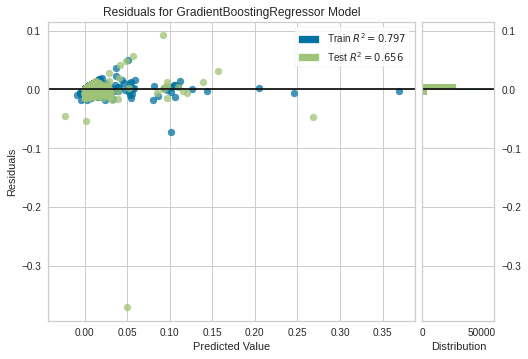

In [ ]:
plot_model(tuned_gbr)

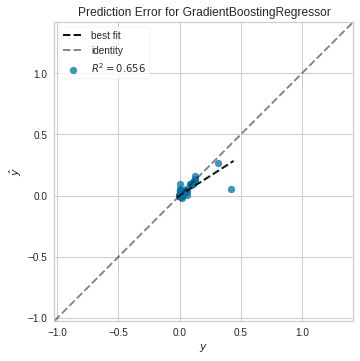

In [ ]:
plot_model(tuned_gbr,plot='error')

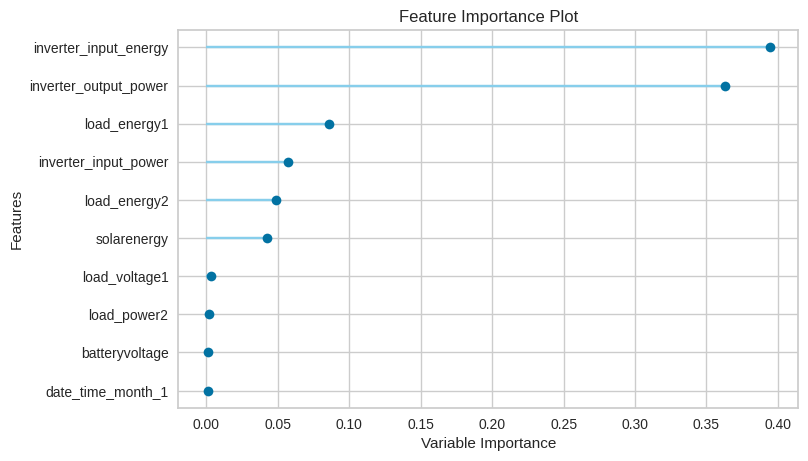

In [ ]:
plot_model(tuned_gbr,plot='feature')

In [ ]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0009,0.0,0.003,0.6561,0.0027,0.3372


,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,load_energy1,load_power1,load_voltage1,load_energy2,load_power2,load_current2,inverter_input_power,inverter_output_power,inverter_input_energy,irradiance,temperature,location_Peru,date_time_month_1,date_time_month_12,date_time_month_2,date_time_month_3,date_time_weekday_0,date_time_weekday_1,date_time_weekday_2,date_time_weekday_3,date_time_weekday_4,date_time_weekday_5,date_time_weekday_6,date_time_is_month_end_1,date_time_is_month_start_1,date_time_hour_0,date_time_hour_1,date_time_hour_10,date_time_hour_11,date_time_hour_12,date_time_hour_13,date_time_hour_14,date_time_hour_15,date_time_hour_16,date_time_hour_17,date_time_hour_18,date_time_hour_19,date_time_hour_2,date_time_hour_20,date_time_hour_21,date_time_hour_22,date_time_hour_23,date_time_hour_3,date_time_hour_4,date_time_hour_5,date_time_hour_6,date_time_hour_7,date_time_hour_8,date_time_hour_9,inverter_output_energy,Label
0,130.570007,1.85,0.00,242.110001,102.199997,1.34,0.00,162.720001,188.350006,0.00,91.120003,0.48,0.48,0.27,0.000,30.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.003987
1,0.000000,0.00,0.00,0.000000,98.500000,0.00,0.01,359.690002,187.529999,0.00,97.209999,0.51,0.19,0.00,0.000,0.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000046
2,0.000000,0.00,0.00,0.000000,96.250000,0.00,0.01,143.910004,185.089996,0.01,86.349998,0.46,0.00,0.00,0.000,0.0,38.439999,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000046
3,0.000000,0.00,0.00,0.000000,98.300003,0.00,0.00,182.350006,188.449997,0.00,91.169998,0.48,0.19,0.00,0.007,15.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000046
4,97.400002,1.23,0.01,120.400002,100.690002,0.72,0.00,124.500000,189.619995,0.00,55.700001,0.29,0.19,0.00,0.000,0.0,40.029999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32205,183.589996,7.41,0.03,1361.680054,103.900002,10.57,0.00,118.739998,185.740005,0.00,99.489998,0.53,0.20,0.00,0.000,720.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000046
32206,0.000000,0.00,0.00,0.000000,97.760002,0.00,0.00,175.800003,188.419998,0.00,87.900002,0.46,0.19,0.00,0.007,15.0,38.439999,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000046
32207,182.389999,5.62,0.02,1025.829956,102.430000,7.46,0.00,140.990005,185.449997,0.00,115.349998,0.62,0.31,0.11,0.000,335.0,38.439999,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007,0.001579
32208,0.000000,1.17,0.00,0.000000,96.959999,0.94,0.00,121.019997,189.300003,0.00,58.869999,0.31,0.19,0.00,0.000,0.0,38.529999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000046


In [ ]:
final_gbr=finalize_model(tuned_gbr)

In [ ]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0009,0.0,0.002,0.8457,0.002,0.3347


,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,load_energy1,load_power1,load_voltage1,load_energy2,load_power2,load_current2,inverter_input_power,inverter_output_power,inverter_input_energy,irradiance,temperature,location_Peru,date_time_month_1,date_time_month_12,date_time_month_2,date_time_month_3,date_time_weekday_0,date_time_weekday_1,date_time_weekday_2,date_time_weekday_3,date_time_weekday_4,date_time_weekday_5,date_time_weekday_6,date_time_is_month_end_1,date_time_is_month_start_1,date_time_hour_0,date_time_hour_1,date_time_hour_10,date_time_hour_11,date_time_hour_12,date_time_hour_13,date_time_hour_14,date_time_hour_15,date_time_hour_16,date_time_hour_17,date_time_hour_18,date_time_hour_19,date_time_hour_2,date_time_hour_20,date_time_hour_21,date_time_hour_22,date_time_hour_23,date_time_hour_3,date_time_hour_4,date_time_hour_5,date_time_hour_6,date_time_hour_7,date_time_hour_8,date_time_hour_9,inverter_output_energy,Label
0,130.570007,1.85,0.00,242.110001,102.199997,1.34,0.00,162.720001,188.350006,0.00,91.120003,0.48,0.48,0.27,0.000,30.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.004072
1,0.000000,0.00,0.00,0.000000,98.500000,0.00,0.01,359.690002,187.529999,0.00,97.209999,0.51,0.19,0.00,0.000,0.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000035
2,0.000000,0.00,0.00,0.000000,96.250000,0.00,0.01,143.910004,185.089996,0.01,86.349998,0.46,0.00,0.00,0.000,0.0,38.439999,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000035
3,0.000000,0.00,0.00,0.000000,98.300003,0.00,0.00,182.350006,188.449997,0.00,91.169998,0.48,0.19,0.00,0.007,15.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000035
4,97.400002,1.23,0.01,120.400002,100.690002,0.72,0.00,124.500000,189.619995,0.00,55.700001,0.29,0.19,0.00,0.000,0.0,40.029999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32205,183.589996,7.41,0.03,1361.680054,103.900002,10.57,0.00,118.739998,185.740005,0.00,99.489998,0.53,0.20,0.00,0.000,720.0,38.439999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000035
32206,0.000000,0.00,0.00,0.000000,97.760002,0.00,0.00,175.800003,188.419998,0.00,87.900002,0.46,0.19,0.00,0.007,15.0,38.439999,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000035
32207,182.389999,5.62,0.02,1025.829956,102.430000,7.46,0.00,140.990005,185.449997,0.00,115.349998,0.62,0.31,0.11,0.000,335.0,38.439999,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007,0.001806
32208,0.000000,1.17,0.00,0.000000,96.959999,0.94,0.00,121.019997,189.300003,0.00,58.869999,0.31,0.19,0.00,0.000,0.0,38.529999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000035


In [ ]:
unseen_predictions=predict_model(final_gbr,data=data_test)
unseen_predictions.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature,Label
0,Peru,2015-12-02 00:05:18,0.0,0.0,0.0,0.0,98.59,0.0,0.0,0.01,188.92,1.00,188.51,0.0,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0,38.44,0.006511
1,Peru,2015-12-02 00:08:56,0.0,0.0,0.0,0.0,98.80,0.0,0.0,0.00,185.63,0.98,188.48,0.0,81.42,0.43,188.48,0.52,0.32,0.007,0.007,45,38.44,0.004072
2,Peru,2015-12-02 00:23:29,0.0,0.0,0.0,0.0,98.97,0.0,0.0,0.00,185.67,0.98,188.51,0.0,87.94,0.46,188.51,0.42,0.22,0.014,0.000,0,38.44,0.003118
3,Peru,2015-12-02 00:25:55,0.0,0.0,0.0,0.0,98.66,0.0,0.0,0.01,181.94,0.96,188.02,0.0,87.72,0.46,188.02,0.42,0.22,0.007,0.007,30,38.44,0.002969
4,Peru,2015-12-02 00:35:37,0.0,0.0,0.0,0.0,98.67,0.0,0.0,0.00,185.25,0.98,188.09,0.0,91.00,0.48,188.09,0.52,0.32,0.007,0.007,30,38.44,0.004072


In [ ]:
save_model(final_gbr,'Final GBR Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='inverter_output_energy',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                                            learning_rate=0.3, loss='ls',
                                            max_depth=5, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_dec